<a href="https://colab.research.google.com/github/SaurabhMaydeo/HeartDisease/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving cleve.mod to cleve (21).mod


In [ ]:
f = open('cleve.mod')
content = f.readlines()[20:]
content[0].split()
lst = [c.split() for c in content]

In [ ]:
df = pd.DataFrame(lst, columns =['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal' , 'is_healthy' ,'class'])

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_healthy,class
0,63.0,male,angina,145.0,233.0,true,hyp,150.0,fal,2.3,down,0.0,fix,buff,H
1,67.0,male,asympt,160.0,286.0,fal,hyp,108.0,true,1.5,flat,3.0,norm,sick,S2
2,67.0,male,asympt,120.0,229.0,fal,hyp,129.0,true,2.6,flat,2.0,rev,sick,S1
3,37.0,male,notang,130.0,250.0,fal,norm,187.0,fal,3.5,down,0.0,norm,buff,H
4,41.0,fem,abnang,130.0,204.0,fal,hyp,172.0,fal,1.4,up,0.0,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,57.0,male,asympt,132.0,207.0,fal,norm,168.0,true,0.0,up,0.0,rev,buff,H
300,49.0,male,notang,118.0,149.0,fal,hyp,126.0,fal,0.8,up,3.0,norm,sick,S1
301,74.0,fem,abnang,120.0,269.0,fal,hyp,121.0,true,0.2,up,1.0,norm,buff,H
302,54.0,fem,notang,160.0,201.0,fal,norm,163.0,fal,0.0,up,1.0,norm,buff,H


In [ ]:
df = df.drop(df.index[-1])

# Exploratory Data Analysis & Preprocessing

---



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         303 non-null    object
 1   sex         303 non-null    object
 2   cp          303 non-null    object
 3   trestbps    303 non-null    object
 4   chol        303 non-null    object
 5   fbs         303 non-null    object
 6   restecg     303 non-null    object
 7   thalach     303 non-null    object
 8   exang       303 non-null    object
 9   oldpeak     303 non-null    object
 10  slope       303 non-null    object
 11  ca          303 non-null    object
 12  thal        303 non-null    object
 13  is_healthy  303 non-null    object
 14  class       303 non-null    object
dtypes: object(15)
memory usage: 37.9+ KB


In [ ]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
indices = df.index[df['ca'] == '?'].tolist()
indices

[143, 157, 165, 250, 262]

In [ ]:
df[['age']] = df[['age']].apply(pd.to_numeric)

df[['trestbps']] = df[['trestbps']].apply(pd.to_numeric)

df[['chol']] = df[['chol']].apply(pd.to_numeric)

df[['thalach']] = df[['thalach']].apply(pd.to_numeric)

df[['oldpeak']] = df[['oldpeak']].apply(pd.to_numeric)

#df = df.replace('?', None)
df = df.replace(to_replace='?', value=np.nan)
df[['ca']] = df[['ca']].apply(pd.to_numeric)

In [ ]:
df.iloc[indices]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_healthy,class
143,52.0,male,notang,138.0,223.0,fal,norm,169.0,fal,0.0,up,NaN,norm,buff,H
157,38.0,male,notang,138.0,175.0,fal,norm,173.0,fal,0.0,up,NaN,norm,buff,H
165,43.0,male,asympt,132.0,247.0,true,hyp,143.0,true,0.1,flat,NaN,rev,sick,S1
250,58.0,male,abnang,125.0,220.0,fal,norm,144.0,fal,0.4,flat,NaN,rev,buff,H
262,38.0,male,notang,138.0,175.0,fal,norm,173.0,fal,0.0,up,NaN,norm,buff,H


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    float64
 1   sex         303 non-null    object 
 2   cp          303 non-null    object 
 3   trestbps    303 non-null    float64
 4   chol        303 non-null    float64
 5   fbs         303 non-null    object 
 6   restecg     303 non-null    object 
 7   thalach     303 non-null    float64
 8   exang       303 non-null    object 
 9   oldpeak     303 non-null    float64
 10  slope       303 non-null    object 
 11  ca          298 non-null    float64
 12  thal        301 non-null    object 
 13  is_healthy  303 non-null    object 
 14  class       303 non-null    object 
dtypes: float64(6), object(9)
memory usage: 37.9+ KB


In [ ]:
df.isna().any()

age           False
sex           False
cp            False
trestbps      False
chol          False
fbs           False
restecg       False
thalach       False
exang         False
oldpeak       False
slope         False
ca             True
thal           True
is_healthy    False
class         False
dtype: bool

In [ ]:
df = df.dropna()


In [ ]:
pd.set_option('float_format', '{:f}'.format)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,296.000000,54.523649,9.059471,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,296.000000,131.604730,17.726620,94.000000,120.000000,130.000000,140.000000,200.000000
chol,296.000000,247.155405,51.977011,126.000000,211.000000,242.500000,275.250000,564.000000
thalach,296.000000,149.560811,22.970792,71.000000,133.000000,152.500000,166.000000,202.000000
oldpeak,296.000000,1.059122,1.166474,0.000000,0.000000,0.800000,1.650000,6.200000
ca,296.000000,0.679054,0.939726,0.000000,0.000000,0.000000,1.000000,3.000000


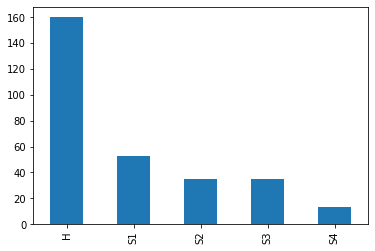

In [ ]:
df['class'].value_counts().plot(kind = 'bar')


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'is_healthy', 'class'],
      dtype='object')

In [ ]:

df["sex"].replace({"male": 1, "fem": 0}, inplace=True)
df["fbs"].replace({"true": 1, "fal": 0}, inplace=True)
df["exang"].replace({"true": 1, "fal": 0}, inplace=True)



In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,is_healthy,class
0,63.000000,1,angina,145.000000,233.000000,1,hyp,150.000000,0,2.300000,down,0.000000,fix,buff,H
1,67.000000,1,asympt,160.000000,286.000000,0,hyp,108.000000,1,1.500000,flat,3.000000,norm,sick,S2
2,67.000000,1,asympt,120.000000,229.000000,0,hyp,129.000000,1,2.600000,flat,2.000000,rev,sick,S1
3,37.000000,1,notang,130.000000,250.000000,0,norm,187.000000,0,3.500000,down,0.000000,norm,buff,H
4,41.000000,0,abnang,130.000000,204.000000,0,hyp,172.000000,0,1.400000,up,0.000000,norm,buff,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.000000,1,notang,124.000000,255.000000,1,norm,175.000000,0,0.000000,up,2.000000,norm,buff,H
299,57.000000,1,asympt,132.000000,207.000000,0,norm,168.000000,1,0.000000,up,0.000000,rev,buff,H
300,49.000000,1,notang,118.000000,149.000000,0,hyp,126.000000,0,0.800000,up,3.000000,norm,sick,S1
301,74.000000,0,abnang,120.000000,269.000000,0,hyp,121.000000,1,0.200000,up,1.000000,norm,buff,H


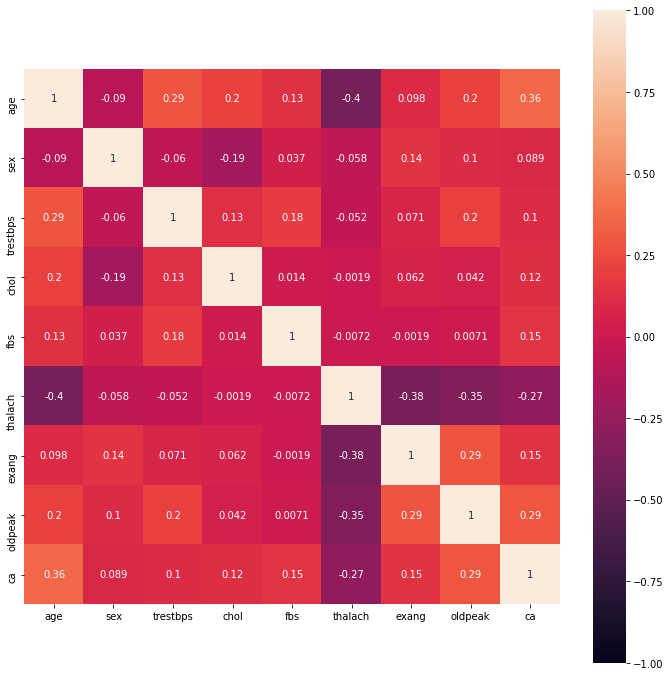

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12,12))
sns.heatmap(corrmat,vmax = 1,square = True,annot = True,vmin = -1)
plt.show()

In [ ]:
#sns.pairplot(df);

In [ ]:
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['class']))}
df['class'] = df['class'].map(class_mapping)
df['class'].value_counts()


y = df['class']
df = df.drop('class',axis=1)


In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'ca', 'cp_angina', 'cp_asympt', 'cp_notang', 'restecg_hyp',
       'restecg_norm', 'slope_flat', 'slope_up', 'thal_norm', 'thal_rev',
       'is_healthy_sick'],
      dtype='object')

In [ ]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_angina,cp_asympt,cp_notang,restecg_hyp,restecg_norm,slope_flat,slope_up,thal_norm,thal_rev,is_healthy_sick
0,63.000000,1,145.000000,233.000000,1,150.000000,0,2.300000,0.000000,1,0,0,1,0,0,0,0,0,0
1,67.000000,1,160.000000,286.000000,0,108.000000,1,1.500000,3.000000,0,1,0,1,0,1,0,1,0,1
2,67.000000,1,120.000000,229.000000,0,129.000000,1,2.600000,2.000000,0,1,0,1,0,1,0,0,1,1
3,37.000000,1,130.000000,250.000000,0,187.000000,0,3.500000,0.000000,0,0,1,0,1,0,0,1,0,0
4,41.000000,0,130.000000,204.000000,0,172.000000,0,1.400000,0.000000,0,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,48.000000,1,124.000000,255.000000,1,175.000000,0,0.000000,2.000000,0,0,1,0,1,0,1,1,0,0
299,57.000000,1,132.000000,207.000000,0,168.000000,1,0.000000,0.000000,0,1,0,0,1,0,1,0,1,0
300,49.000000,1,118.000000,149.000000,0,126.000000,0,0.800000,3.000000,0,0,1,1,0,0,1,1,0,1
301,74.000000,0,120.000000,269.000000,0,121.000000,1,0.200000,1.000000,0,0,0,1,0,0,1,1,0,0


In [ ]:
y

0      0
1      2
2      1
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: class, Length: 296, dtype: int64

In [ ]:
y.value_counts()

0    160
1     53
3     35
2     35
4     13
Name: class, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res_OS , Y_res_OS = sm.fit_resample(df,y)
pd.Series(Y_res_OS).value_counts()

X_res_OS = pd.DataFrame(X_res_OS,columns=df.columns)
Y_res_OS = pd.DataFrame(Y_res_OS)

df = X_res_OS
y = Y_res_OS


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
y.value_counts()

4    160
3    160
2    160
1    160
0    160
dtype: int64

In [ ]:
len(df.columns)

19

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.1, random_state=0)

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
              }
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}


In [ ]:
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 10, verbose=2, n_jobs = 4, refit = True)

In [ ]:
rf_Grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    3.1s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   21.8s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   50.8s
[Parallel(n_jobs=4)]: Done 1272 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 2002 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 2892 tasks      | elapsed:  3.4min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  3.7min finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
rf_Grid.best_params_


{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 64}

In [ ]:
print (f'Train Accuracy - : {rf_Grid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(X_test,y_test):.3f}')


Train Accuracy - : 0.808
Test Accuracy - : 0.800


In [ ]:
y_pr=rf_Grid.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

y_pr
target_names = ['H', 'S1', 'S2', 'S3', 'S4']
print(classification_report(y_test, y_pr, target_names=target_names))

              precision    recall  f1-score   support

           H       1.00      1.00      1.00        17
          S1       0.75      0.75      0.75         8
          S2       0.84      0.76      0.80        21
          S3       0.53      0.64      0.58        14
          S4       0.84      0.80      0.82        20

    accuracy                           0.80        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.81      0.80      0.80        80



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, rf_Grid.predict_proba(X_test), multi_class='ovr')

0.932170203854526